# Iris Project

In [1]:
import pandas    
print('pandas version is: {}'.format(pandas.__version__))    
import numpy    
print('numpy version is:{}'.format(numpy.__version__))    
import seaborn    
print('seaborn version is{}'.format(seaborn.__version__))    
import sklearn    
print('sklearn version is:{}'.format(sklearn.__version__)) 

pandas version is: 1.1.1
numpy version is:1.18.2
seaborn version is0.10.0
sklearn version is:0.23.2


In [2]:
# Load data

import pandas as pd

iris=pd.read_csv('data/Iris.csv')
iris.shape

(150, 6)

In [3]:
iris.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

## Visualization

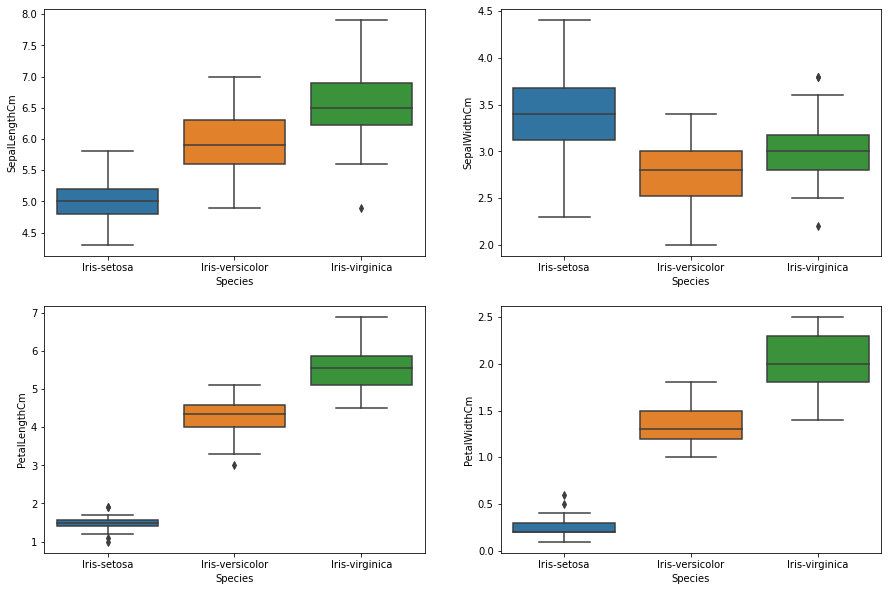

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)    
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)    
plt.subplot(2,2,2)    
sns.boxplot(x='Species',y='SepalWidthCm',data=iris)    
plt.subplot(2,2,3)    
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)    
plt.subplot(2,2,4)    
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


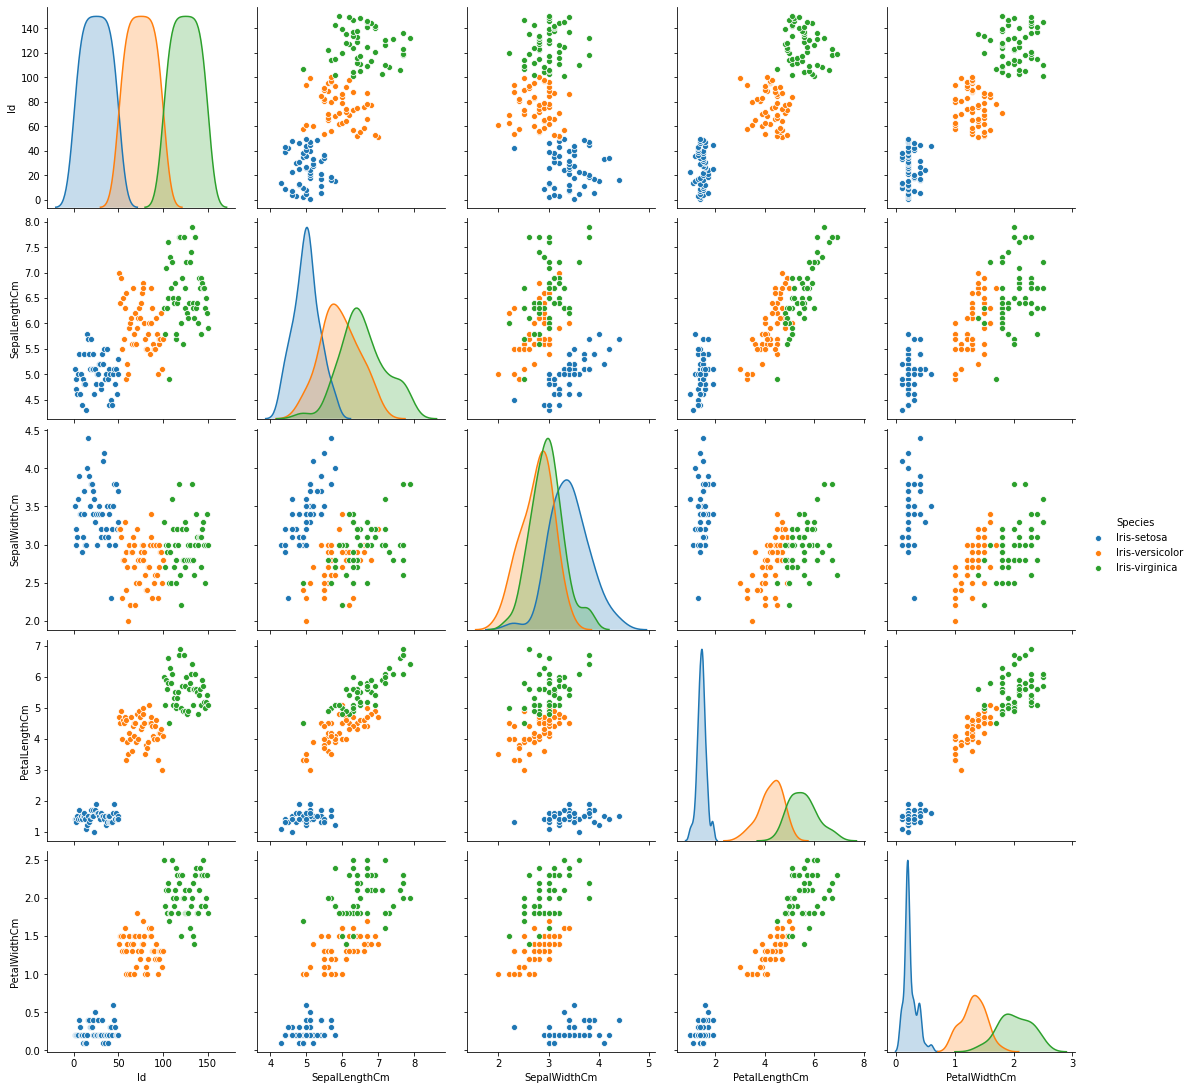

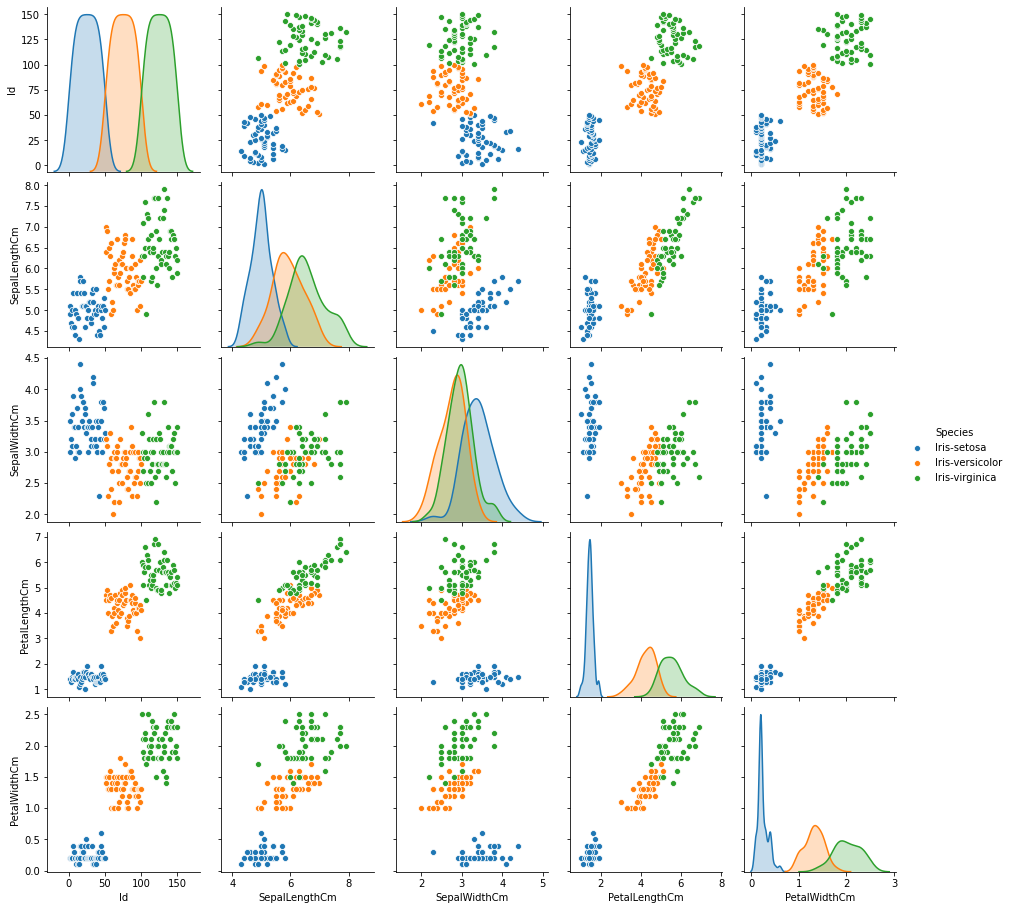

In [8]:
#Pairwise joint plot (scatter matrix)    
sns.pairplot(iris, hue='Species', size=3, diag_kind="kde")    
sns.pairplot(iris,hue='Species')

## Machine Learning Modeling

In [9]:
# importing alll the necessary packages to use the various classification algorithms
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm 
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


import warnings
warnings.simplefilter(action='ignore')

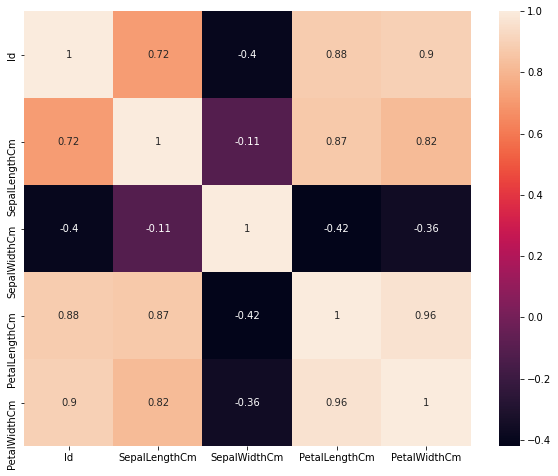

In [10]:
# correlation
plt.figure(figsize=(10,8))
sns.heatmap(iris.corr(), annot=True)
plt.show()

In [11]:
#dataset spliting    

X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = iris.Species

In [12]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 24)    

In [13]:
print("size of X_train: " ,X_train.shape)
print("size of y_train: " ,y_train.shape)
print("size of X_test: " ,X_test.shape)
print("size of y_test: " ,y_test.shape)

size of X_train:  (105, 4)
size of y_train:  (105,)
size of X_test:  (45, 4)
size of y_test:  (45,)


## Logistic Regression

In [14]:
model = LogisticRegression() # select the logistic algorithm

# we train the algorithm with training data and training output
model.fit(X_train, y_train.values)

# we pass the testing data to the stored algorithm to predict the outcome
y_pred = model.predict(X_test.values)

# we check the accuracy of the algorithm
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression is:  0.9777777777777777


In [15]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.95      1.00      0.97        18

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Support Vector Machine

In [16]:
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(X_train, y_train)

# we pass the testing data to the stored algorithm to predict the outcome
y_pred = model.predict(X_test)
print('The accuracy of the SVM is: ', metrics.accuracy_score(y_pred, y_test)) # we check the accuracy of the algorithm

The accuracy of the SVM is:  0.9777777777777777


In [17]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.95      1.00      0.97        18

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Decision Tree

In [18]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Decision Tree is:  0.9777777777777777


In [19]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.95      1.00      0.97        18

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



## K-Nearest Neighbors

In [20]:
model = KNeighborsClassifier(n_neighbors=2) # this examines 3 neighbors for putting the data into class
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of KNN is:  0.9555555555555556


In [21]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



## Do in Loop

In [22]:
#evaluate model to determine better algorithm    
models = []    
models.append(('LR', LogisticRegression()))  
models.append(('SVC', svm.SVC())) 
models.append(('CART', DecisionTreeClassifier()))    
models.append(('LDA', LinearDiscriminantAnalysis()))    
models.append(('NB', GaussianNB()))    
models.append(('KNN', KNeighborsClassifier(n_neighbors=2)))

models

[('LR', LogisticRegression()),
 ('SVC', SVC()),
 ('CART', DecisionTreeClassifier()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('NB', GaussianNB()),
 ('KNN', KNeighborsClassifier(n_neighbors=2))]

In [23]:
for name, model in models: 
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('The accuracy of ' + name + ':', metrics.accuracy_score(y_pred, y_test))

The accuracy of LR: 0.9777777777777777
The accuracy of SVC: 0.9777777777777777
The accuracy of CART: 0.9777777777777777
The accuracy of LDA: 0.9777777777777777
The accuracy of NB: 0.9555555555555556
The accuracy of KNN: 0.9555555555555556


In [24]:
for name, model in models: 
    
    scores = []
    cv = KFold(n_splits=5, random_state=24) 
    
    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index)
        
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        scores.append(metrics.accuracy_score(y_test, y_pred))
        
    
    print(name + " 5-fold scores: ", scores)
    print("mean and std: ", np.mean(scores), np.std(scores), '\n')

LR 5-fold scores:  [1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.8333333333333334]
mean and std:  0.9266666666666665 0.06798692684790378 

SVC 5-fold scores:  [1.0, 1.0, 0.8333333333333334, 0.9333333333333333, 0.7]
mean and std:  0.8933333333333333 0.11430952132988166 

CART 5-fold scores:  [1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.7333333333333333]
mean and std:  0.9066666666666666 0.0997775303139718 

LDA 5-fold scores:  [1.0, 1.0, 0.9, 1.0, 0.9]
mean and std:  0.96 0.04898979485566354 

NB 5-fold scores:  [1.0, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9333333333333333]
mean and std:  0.9466666666666667 0.03399346342395189 

KNN 5-fold scores:  [1.0, 1.0, 0.9, 0.9, 0.7333333333333333]
mean and std:  0.9066666666666666 0.09752492558885198 

